# The problem

# 0. Imports

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-white')

## 0.1. Loading data

In [47]:
df_raw = pd.read_excel('../data/raw/default_of_credit_card_clients__courseware_version_1_21_19.xls')

# 1. Data description

In [48]:
df1 = df_raw.copy()
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [52]:
df1.rename(columns={'default payment next month': 'default'}, inplace=True)

In [53]:
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

## 1.1. Data dictionary

1. **Response Variable:**
   - **Default Payment (Y):** Binary variable (1 = Yes, 0 = No)

2. **Explanatory Variables:**

   - **Demographic Information:**
      - LIMIT_BAL: Amount of the given credit (NT dollar) - Includes individual and supplementary family credit.
      - SEX: Gender (1 = Male, 2 = Female)
      - EDUCATION: Education (1 = Graduate School, 2 = University, 3 = High School, 4 = Others)
      - MARRIAGE: Marital Status (1 = Married, 2 = Single, 3 = Others)
      - AGE: Age (in years)

   - **History of Past Payment (Repayment Status):**
      - PAY_1: Repayment status in September 2005
      - PAY_2: Repayment status in August 2005
      - ...
      - PAY_6: Repayment status in April 2005
      - Measurement Scale: -1 = Pay duly, 1 = Payment delay for one month, 2 = Payment delay for two months, ..., 8 = Payment delay for eight months, 9 = Payment delay for nine months and above

   - **Amount of Bill Statement (NT dollar):**
      - BILL_AMT1: Bill statement amount in September 2005
      - BILL_AMT2: Bill statement amount in August 2005
      - ...
      - BILL_AMT6: Bill statement amount in April 2005

   - **Amount of Previous Payment (NT dollar):**
      - PAY_AMT1: Amount paid in September 2005
      - PAY_AMT2: Amount paid in August 2005
      - ...
      - PAY_AMT6: Amount paid in April 2005

## 1.2. Data dimension

In [54]:
print(f'Number of lines: {df1.shape[0]}')
print(f'Number of rows: {df1.shape[1]}')

Number of lines: 30000
Number of rows: 25


### 1.2.1. Unique ID's

In [55]:
print(f"There are {df1['ID'].nunique()} unique ID's")

There are 29687 unique ID's


### 1.2.2. Duplicated ID's

In [56]:
# Who are nonunique id's?
aux1 = df1['ID'].value_counts(ascending=False)
aux1

ID
ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
                ..
2edeb3a6-d38d    1
27e11893-92e9    1
2b1c282b-441e    1
bd737997-0eb0    1
15d69f9f-5ad3    1
Name: count, Length: 29687, dtype: int64

In [57]:
aux1.value_counts()
# There are 313 duplicated id's --> 626 entries

count
1    29374
2      313
Name: count, dtype: int64

In [58]:
# Apparently, among the duplicated id's, there is a duplicated line with only zero values. Remove them? Yes
df1[df1.duplicated(subset=['ID'], keep=False)].head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
141,26bde6da-f148,180000,1,2,2,28,-1,-1,-1,-1,...,332,416,416,0,416,332,500,3500,832,0
196,42009c72-651f,150000,2,2,1,34,-2,-2,-2,-2,...,116,0,1500,0,0,116,0,1500,0,0
241,26bde6da-f148,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,42009c72-651f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
323,73ed1381-3a3f,230000,2,2,1,28,0,0,0,-2,...,2100,767,6173,1710,1100,1000,767,6173,1000,1


In [59]:
# Creating a mask to remove only those lines with all values iqual to zero
mask_zero_values = df1 == 0

# .all(axis=1) returns from mask_zero_values all lines where all values are iqual True
lines_with_zeros = mask_zero_values.iloc[:, 1:].all(axis=1)

In [60]:
# Number of lines with all values True, which means all values are zero. There are 315 lines, two more than duplicated
sum(lines_with_zeros)

315

In [61]:
# Removing all full zero lines
df1_clean = df1.loc[~lines_with_zeros].reset_index(drop=True).copy()
df1_clean.shape

(29685, 25)

## 1.3. Data types

In [62]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29685 entries, 0 to 29684
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         29685 non-null  object
 1   LIMIT_BAL  29685 non-null  int64 
 2   SEX        29685 non-null  int64 
 3   EDUCATION  29685 non-null  int64 
 4   MARRIAGE   29685 non-null  int64 
 5   AGE        29685 non-null  int64 
 6   PAY_1      29685 non-null  object
 7   PAY_2      29685 non-null  int64 
 8   PAY_3      29685 non-null  int64 
 9   PAY_4      29685 non-null  int64 
 10  PAY_5      29685 non-null  int64 
 11  PAY_6      29685 non-null  int64 
 12  BILL_AMT1  29685 non-null  int64 
 13  BILL_AMT2  29685 non-null  int64 
 14  BILL_AMT3  29685 non-null  int64 
 15  BILL_AMT4  29685 non-null  int64 
 16  BILL_AMT5  29685 non-null  int64 
 17  BILL_AMT6  29685 non-null  int64 
 18  PAY_AMT1   29685 non-null  int64 
 19  PAY_AMT2   29685 non-null  int64 
 20  PAY_AMT3   29685 non-null  i

In [63]:
# 0 and -2 are not described in data dictionary
df1_clean['PAY_1'].value_counts()

PAY_1
0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: count, dtype: int64

In [64]:
# Excluding lines "not available"
df1_clean = df1_clean.query('PAY_1 != "Not available"').reset_index(drop=True)

In [65]:
# Changing PAY_1 type
df1_clean['PAY_1'] = df1_clean['PAY_1'].astype('int')
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         26664 non-null  object
 1   LIMIT_BAL  26664 non-null  int64 
 2   SEX        26664 non-null  int64 
 3   EDUCATION  26664 non-null  int64 
 4   MARRIAGE   26664 non-null  int64 
 5   AGE        26664 non-null  int64 
 6   PAY_1      26664 non-null  int64 
 7   PAY_2      26664 non-null  int64 
 8   PAY_3      26664 non-null  int64 
 9   PAY_4      26664 non-null  int64 
 10  PAY_5      26664 non-null  int64 
 11  PAY_6      26664 non-null  int64 
 12  BILL_AMT1  26664 non-null  int64 
 13  BILL_AMT2  26664 non-null  int64 
 14  BILL_AMT3  26664 non-null  int64 
 15  BILL_AMT4  26664 non-null  int64 
 16  BILL_AMT5  26664 non-null  int64 
 17  BILL_AMT6  26664 non-null  int64 
 18  PAY_AMT1   26664 non-null  int64 
 19  PAY_AMT2   26664 non-null  int64 
 20  PAY_AMT3   26664 non-null  i

## 1.4. Descriptive statistics

In [72]:
df1_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,26664.0,167919.054905,129839.453081,10000.0,50000.00,140000.0,240000.00,800000.0
SEX,26664.0,1.603060,0.489272,1.0,1.00,2.0,2.00,2.0
EDUCATION,26664.0,1.842334,0.744661,1.0,1.00,2.0,2.00,4.0
MARRIAGE,26664.0,1.550630,0.522015,0.0,1.00,2.0,2.00,3.0
AGE,26664.0,35.505213,9.227442,21.0,28.00,34.0,41.00,79.0
PAY_1,26664.0,-0.017777,1.126769,-2.0,-1.00,0.0,0.00,8.0
PAY_2,26664.0,-0.133363,1.198640,-2.0,-1.00,0.0,0.00,8.0
PAY_3,26664.0,-0.167679,1.199165,-2.0,-1.00,0.0,0.00,8.0
PAY_4,26664.0,-0.225023,1.167897,-2.0,-1.00,0.0,0.00,8.0
PAY_5,26664.0,-0.269764,1.131735,-2.0,-1.00,0.0,0.00,8.0


**Sumary:**
- Some attributes represents cattegories even though their values are numeric
    - 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default'
- Monetary values are expressed in New Taiwan Dollars (NT$ 31,44 --> US$ 1,00)

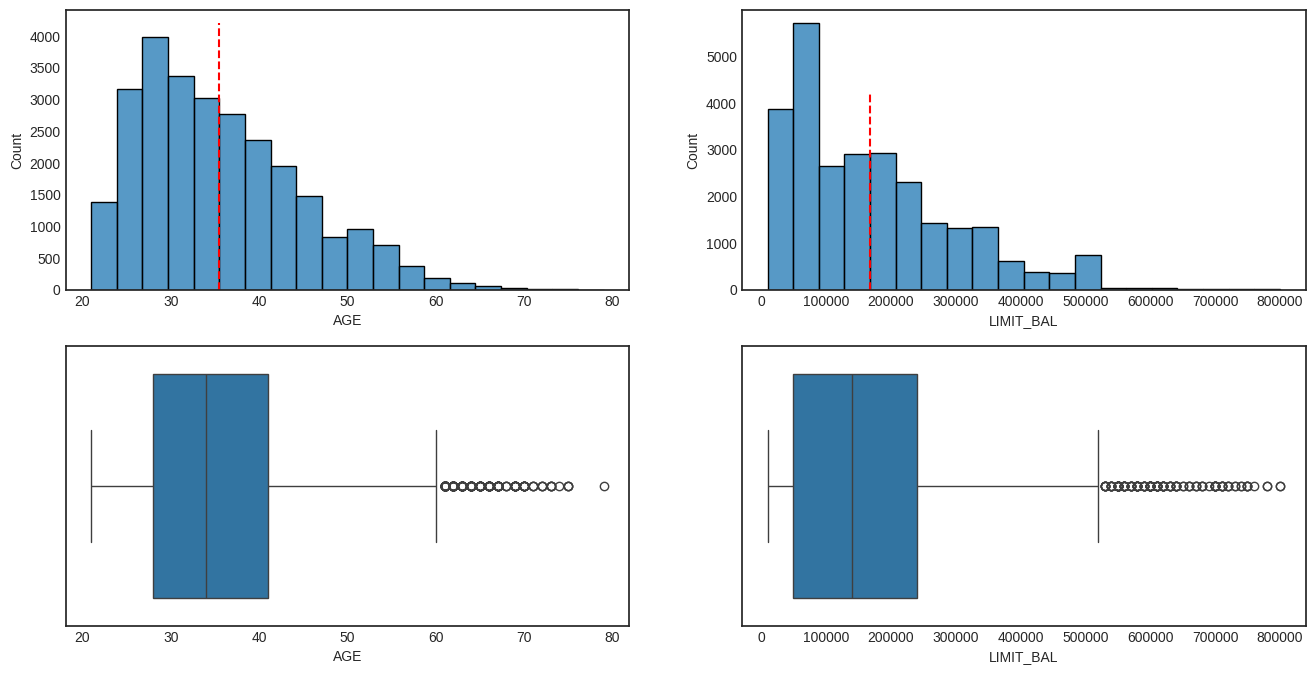

In [74]:
fig, ax = plt.subplots(2, 2, figsize=(16,8))
sns.histplot(data=df1_clean, x=df1_clean['AGE'], bins=20, ax=ax[0][0])
sns.boxplot(data=df1_clean, x=df1_clean['AGE'], ax=ax[1][0])
sns.histplot(data=df1_clean, x=df1_clean['LIMIT_BAL'], bins=20, ax=ax[0][1])
sns.boxplot(data=df1_clean, x=df1_clean['LIMIT_BAL'], ax=ax[1][1])
ax[0][0].vlines(x=df1_clean['AGE'].mean(), ymin=0, ymax=4200, linestyles='dashed', color='red')
ax[0][1].vlines(x=df1_clean['LIMIT_BAL'].mean(), ymin=0, ymax=4200, linestyles='dashed', color='red')

#### Education

In [68]:
# 0, 5 and 6 are unknown codes --> convert them to zero which is used for "others"
df1_clean['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: count, dtype: int64

In [69]:
df1_clean['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df1_clean['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

In [70]:
df1_clean[['EDUCATION', 'default']].groupby('EDUCATION').mean()

,default
EDUCATION,
1,0.193901
2,0.235913
3,0.255479
4,0.074879


#### Marriage

In [45]:
# 0 in unkown --> convert to 3
df1_clean['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      286
0       48
Name: count, dtype: int64

In [46]:
df1_clean['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df1_clean['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      334
Name: count, dtype: int64

### 1.4.2. Categorical attributes

# 2. Feature Engineering

# 3. Exploratory Data Analysis (EDA)

# 4. Data Preparation